## Case study on Pre-processing

> _Do the following on titanic dataset._
1. **Load the dataset into python environment.**
2. **Make ‘PassengerId’ as the index column.**
3. **Check the basic details of the dataset.**
4. **Fill in all the missing values present in all the columns in the dataset.**
5. **Check and handle outliers in at least 3 columns in the dataset.**
6. **Do min max scaling on the feature set (Take ‘Survived’ as target).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Make ‘PassengerId’ as the index column

In [5]:
data=pd.read_csv('titanic_dataset.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Check the basic details of the dataset

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,B96 B98,S
888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,B96 B98,S
890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,B96 B98,Q


In [7]:
data.shape

(891, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

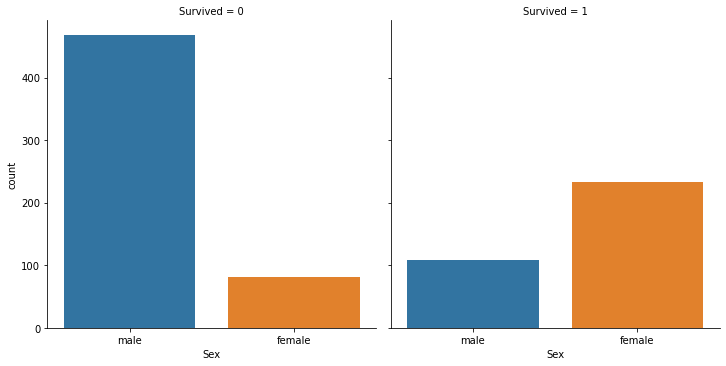

In [10]:
sns.catplot(x ="Sex", col ='Survived', kind ="count", data = data)

>  _**Insights:-_**
*  **Most of the male passengers are not survived.**    

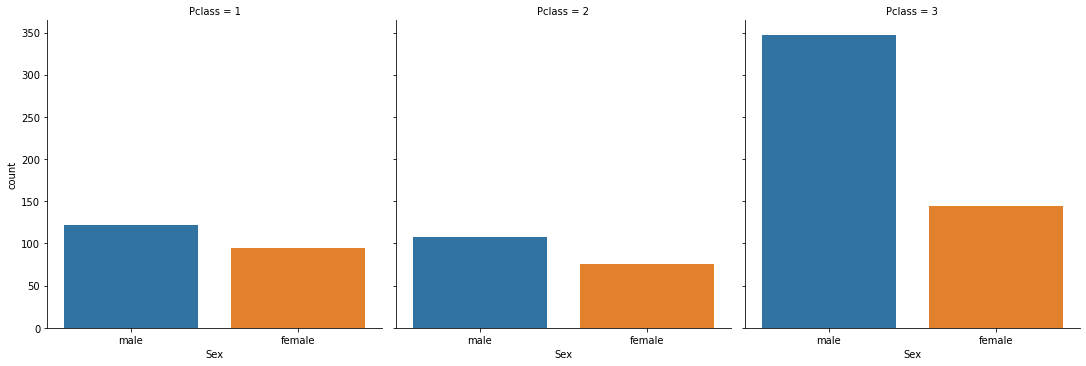

In [11]:
sns.catplot(x ="Sex", col ='Pclass', kind ="count", data = data)

>  _**Insights:-_**
*  **In each passenger class most of them are males .**    

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

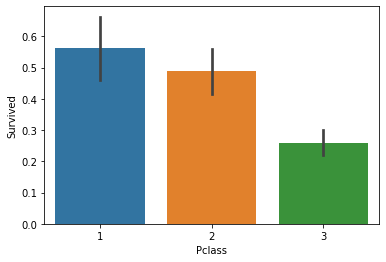

In [44]:
sns.barplot(x='Pclass', y='Survived', data=data)

>  _**Insights:-_**
*  **Most of them are survived in passenger class 1.**    

<AxesSubplot:xlabel='Sex', ylabel='Age'>

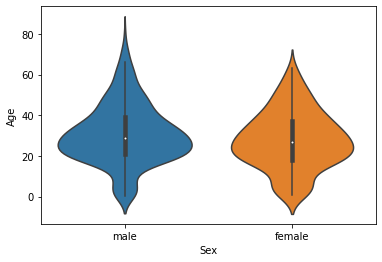

In [12]:
sns.violinplot(x ="Sex", y ="Age", data = data, split = True)

>  _**Insights:-_**
*  **Most of the males and females passengers are belongs to the 20-40 age group.**    

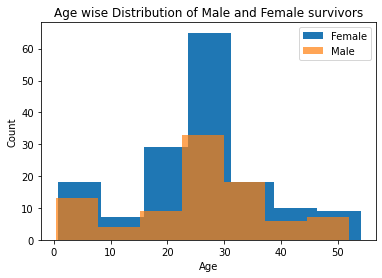

In [68]:
plt.hist(data['Age'][(data['Sex'] == 'female') & (data['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(data['Age'][(data['Sex'] == 'male') & (data['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()


>  _**Insights:-_**
*  **Most of the female passengers are survived.**    

##**Insights:**


*   The dataset contains the details of passengers, like -     
      *   _**PassengerId** - Id of passenger's_      
      *   _**Survived** - Survived details of passenger's[0= No; 1=Yes]_
      *   _**Pclass** - Passenger's class[1= 1st; 2=2nd; 3=3rd] _
      *   _**Name** - Name of passenger's _
      *   _**Sex** - Passenger's gender [ Female, Male ]_
      *   _**Age** - Age of passenger's_
      *   _**Sibsp** - Number of siblings/Spouses Aboard_
      *   _**Parch** - Number of Parents/Children Abroad_
      *   _**Ticket** - Ticket number of passenger's _  
      *   _**Fare** - Fare of passenger's _  
      *   _**Cabin** - Cabin_
      *   _**Embarked** - Port of Embarkation[C= Cherbourg; Q=Queenstown; S=Southampton] _  
*   **891 Observations** and **11 Features** are found.
*   The **Null values** are recorded for:
      *   _The feature **Age** contains **177** null observations_
      *   _The feature **Cabin** contains **687** null observations_
      *   _The feature **Embarked** contains **2** null observations_
*  The **datatype** for the features - 
      *   _**Survived, Pclass, SibSp, Parch**  - are given as Integer with 64-bits_
      *   _**Name, Sex, Ticket, Cabin,Embarked** - are given as Objects_
      *   _**Age, Fare** - are given as Float with 64-bits_


#### 4. Fill in all the missing values present in all the columns in the dataset

In [13]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### For checking the skewness

<function matplotlib.pyplot.show(close=None, block=None)>

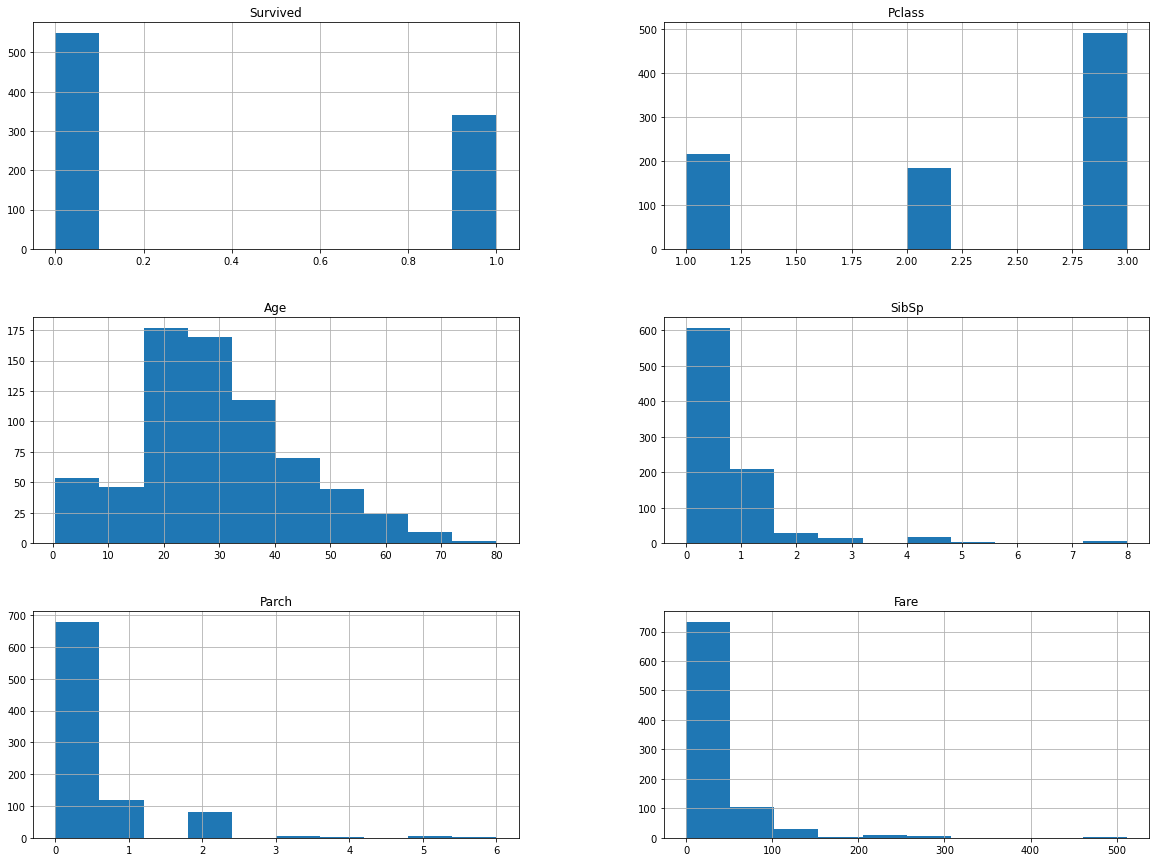

In [14]:
freqgraph=data.select_dtypes(include=['float', 'int64'])
freqgraph.hist(figsize=(20,15))
plt.show

>  _**Insights:-_**
*  **Age, SibSp, parch and Fare are right skewed.**    

##### Fill the missing values

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [16]:
data['Embarked'].fillna(data['Embarked'].value_counts().index[0],inplace=True)

In [17]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [18]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Survived')

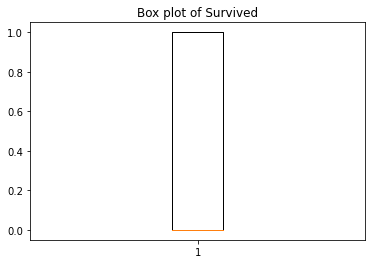

In [19]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

>  _**Insights:-_**
*  **No outliers found.**   

Text(0.5, 1.0, 'Box plot of Pclass')

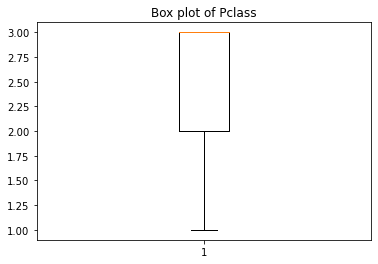

In [20]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

>  _**Insights:-_**
*  **No outliers found.**   

Text(0.5, 1.0, 'Box plot of Age')

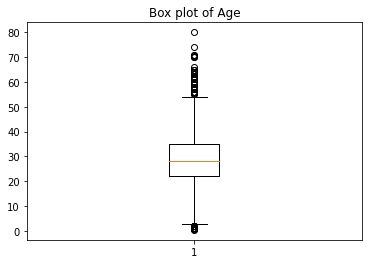

In [21]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

#### To find different quartile

In [22]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [23]:
 outlier = []
for x in data ['Age']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [24]:
ind1= data['Age'] > up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [25]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880] , inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

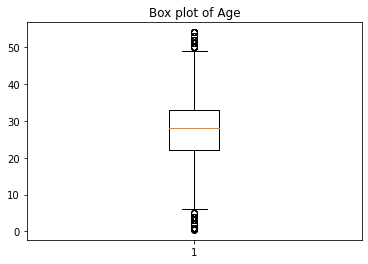

In [26]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of SibSp')

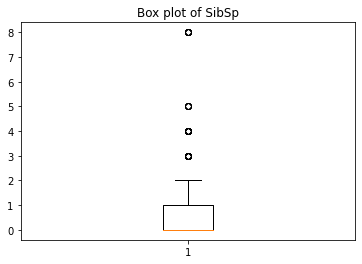

In [27]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [28]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)
data.loc[data['SibSp'] > up_lim]

-1.5
2.5


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,B96 B98,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,B96 B98,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,B96 B98,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,B96 B98,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,B96 B98,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,B96 B98,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,B96 B98,S


In [29]:
data.drop(data.loc[data['SibSp']>up_lim].index, inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

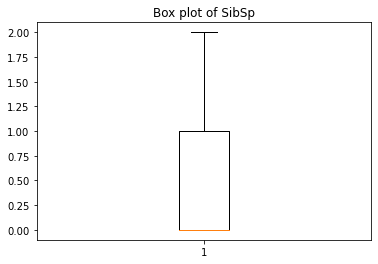

In [30]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Fare')

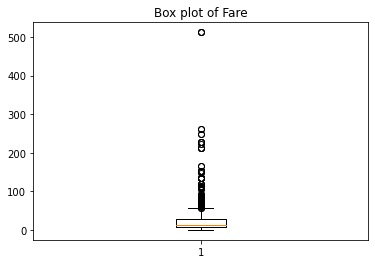

In [33]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [34]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)
data.loc[data['Fare'] > up_lim]

-21.997999999999998
57.7188


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,B96 B98,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S
...,...,...,...,...,...,...,...,...,...,...,...
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C


In [35]:
data.drop(data.loc[data['Fare']>up_lim].index, inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

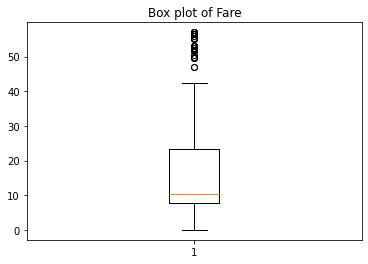

In [36]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

### 6.Do min max scaling on the feature set (Take ‘Survived’ as target).

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='Survived', ylabel='Density'>

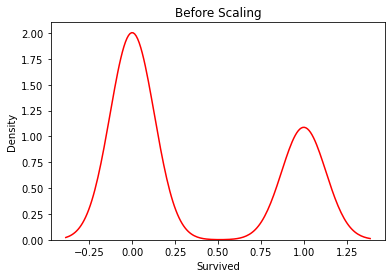

In [55]:
plt.title('Before Scaling')
sns.kdeplot(data['Survived'], color ='r')

In [38]:
data['Survived'].describe()

count    699.000000
mean       0.351931
std        0.477915
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [58]:
from sklearn.preprocessing import MinMaxScaler
Survived = MinMaxScaler().fit(data['Survived'].values.reshape(-1, 1))
data['Survived'] = Survived.transform(data['Survived'].values.reshape(-1, 1))
data['Survived'].describe()

count    699.000000
mean       0.351931
std        0.477915
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64